In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('C:/Users/Jwalit/Desktop/Halliburton data science/facies_labels.csv')
df.head()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,Facies,WellName,FaciesLabel,FaciesDescription
0,2793.0,77.45,0.664,9.9,11.915,4.6,3,SHRIMPLIN,FSiS,Nonmarine fine siltstone
1,2793.5,78.26,0.661,14.2,12.565,4.1,3,SHRIMPLIN,FSiS,Nonmarine fine siltstone
2,2794.0,79.05,0.658,14.8,13.050,3.6,3,SHRIMPLIN,FSiS,Nonmarine fine siltstone
3,2794.5,86.10,0.655,13.9,13.115,3.5,3,SHRIMPLIN,FSiS,Nonmarine fine siltstone
4,2795.0,74.58,0.647,13.5,13.300,3.4,3,SHRIMPLIN,FSiS,Nonmarine fine siltstone


In [3]:
df['FaciesDescription'].value_counts()

Nonmarine course siltstone    940
Nonmarine fine siltstone      780
Packstone-grainstone          686
Wackestone                    582
Mudstone                      296
Marine siltstone and shale    271
Nonmarine sandstone           268
Phylloid-algal bafflestone    185
Dolomite                      141
Name: FaciesDescription, dtype: int64

In [4]:
le = LabelEncoder()
label = le.fit_transform(df['FaciesDescription'])

In [5]:
df.drop(['FaciesDescription'], axis='columns').head()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,Facies,WellName,FaciesLabel
0,2793.0,77.45,0.664,9.9,11.915,4.6,3,SHRIMPLIN,FSiS
1,2793.5,78.26,0.661,14.2,12.565,4.1,3,SHRIMPLIN,FSiS
2,2794.0,79.05,0.658,14.8,13.050,3.6,3,SHRIMPLIN,FSiS
3,2794.5,86.10,0.655,13.9,13.115,3.5,3,SHRIMPLIN,FSiS
4,2795.0,74.58,0.647,13.5,13.300,3.4,3,SHRIMPLIN,FSiS


In [6]:
df['Facies'] = label
df.head()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,Facies,WellName,FaciesLabel,FaciesDescription
0,2793.0,77.45,0.664,9.9,11.915,4.6,4,SHRIMPLIN,FSiS,Nonmarine fine siltstone
1,2793.5,78.26,0.661,14.2,12.565,4.1,4,SHRIMPLIN,FSiS,Nonmarine fine siltstone
2,2794.0,79.05,0.658,14.8,13.050,3.6,4,SHRIMPLIN,FSiS,Nonmarine fine siltstone
3,2794.5,86.10,0.655,13.9,13.115,3.5,4,SHRIMPLIN,FSiS,Nonmarine fine siltstone
4,2795.0,74.58,0.647,13.5,13.300,3.4,4,SHRIMPLIN,FSiS,Nonmarine fine siltstone


In [7]:
df['Facies'].value_counts()

3    940
4    780
6    686
8    582
2    296
1    271
5    268
7    185
0    141
Name: Facies, dtype: int64

In [8]:
le.classes_

array(['Dolomite', 'Marine siltstone and shale', 'Mudstone',
       'Nonmarine course siltstone', 'Nonmarine fine siltstone',
       'Nonmarine sandstone', 'Packstone-grainstone',
       'Phylloid-algal bafflestone', 'Wackestone'], dtype=object)

In [9]:
df.isnull().sum()

Depth                  0
GR                     0
ILD_log10              0
DeltaPHI               0
PHIND                  0
PE                   917
Facies                 0
WellName               0
FaciesLabel            0
FaciesDescription      0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Depth,4149.0,2906.867438,133.300164,2573.500000,2821.500,2932.5000,3007.000,3138.000
GR,4149.0,64.933985,30.302530,10.149000,44.730,64.9900,79.438,361.150
ILD_log10,4149.0,0.659566,0.252703,-0.025949,0.498,0.6390,0.822,1.800
DeltaPHI,4149.0,4.402484,5.274947,-21.832000,1.600,4.3000,7.500,19.312
PHIND,4149.0,13.201066,7.132846,0.550000,8.500,12.0200,16.050,84.400
PE,3232.0,3.725014,0.896152,0.200000,3.100,3.5515,4.300,8.094
Facies,4149.0,4.389009,2.205681,0.000000,3.000,4.0000,6.000,8.000


In [11]:
df['PE'].fillna(df['PE'].mean(), inplace = True)

In [12]:
df['PE'].isnull().sum()

0

In [13]:
X = df[['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']]
y = df['Facies']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42, stratify=y)

In [15]:
X_train.shape

(2779, 6)

In [16]:
X_test.shape

(1370, 6)

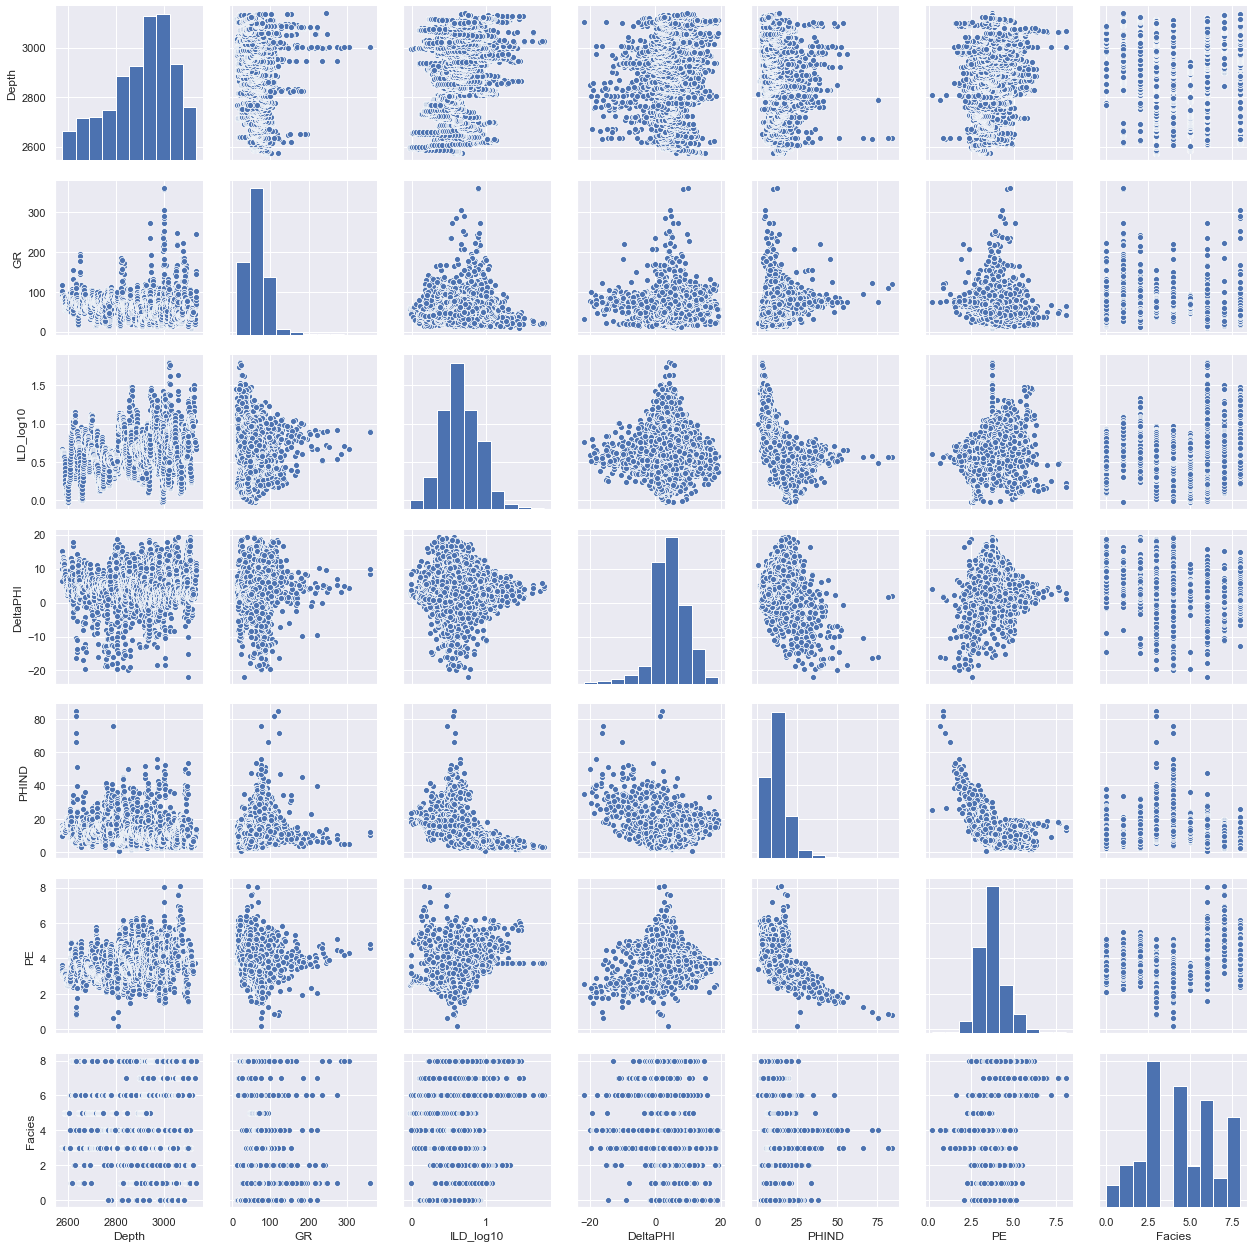

In [17]:
sns.pairplot(df)

In [18]:
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [19]:
k_values = {}
k=1

while k <= 30:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    performance = metrics.accuracy_score(y_test, predictions)
    k_values[k] = round(performance, 4)
    k += 1

In [20]:
k_values

{1: 0.6927,
 2: 0.6672,
 3: 0.6584,
 4: 0.6672,
 5: 0.662,
 6: 0.6474,
 7: 0.6482,
 8: 0.638,
 9: 0.635,
 10: 0.6241,
 11: 0.6285,
 12: 0.6102,
 13: 0.6117,
 14: 0.6036,
 15: 0.6044,
 16: 0.6007,
 17: 0.5949,
 18: 0.5964,
 19: 0.5993,
 20: 0.5869,
 21: 0.5912,
 22: 0.5825,
 23: 0.5854,
 24: 0.5796,
 25: 0.5781,
 26: 0.5766,
 27: 0.5745,
 28: 0.5715,
 29: 0.5701,
 30: 0.5664}

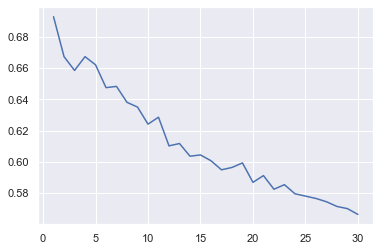

In [21]:
plt.plot(list(k_values.keys()), list(k_values.values()))
plt.show()

In [22]:
test_scores = []
train_scores = []
for i in range(1,25):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [23]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [24]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 69.27007299270073 % and k = [1]


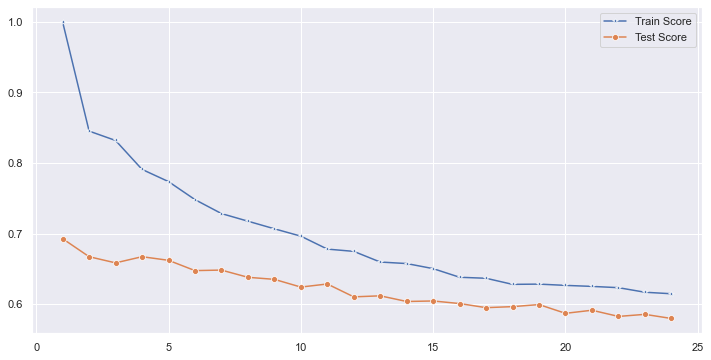

In [25]:
plt.figure(figsize=(12,6))
p = sns.lineplot(range(1,25),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,25),test_scores,marker='o',label='Test Score')

In [26]:
knn = KNeighborsClassifier(1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6927007299270073

In [27]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 29,   3,   2,   3,   0,   0,   6,   2,   2],
       [  0,  62,   6,   5,   3,   0,   4,   1,   8],
       [  2,   7,  50,   5,   9,   0,  13,   1,  11],
       [  1,   7,   1, 220,  53,  17,   2,   0,   9],
       [  1,   7,   2,  47, 189,   3,   3,   0,   6],
       [  0,   0,   0,  12,   4,  71,   0,   0,   1],
       [  4,   5,  12,  11,   6,   1, 149,   7,  32],
       [  2,   0,   2,   1,   0,   0,   2,  53,   1],
       [  3,   6,  18,   9,   4,   0,  25,   1, 126]], dtype=int64)

In [28]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,All
True,,,,,,,,,,
0,29,3,2,3,0,0,6,2,2,47
1,0,62,6,5,3,0,4,1,8,89
2,2,7,50,5,9,0,13,1,11,98
3,1,7,1,220,53,17,2,0,9,310
4,1,7,2,47,189,3,3,0,6,258
5,0,0,0,12,4,71,0,0,1,88
6,4,5,12,11,6,1,149,7,32,227
7,2,0,2,1,0,0,2,53,1,61
8,3,6,18,9,4,0,25,1,126,192


Text(0.5, 12.5, 'Predicted label')

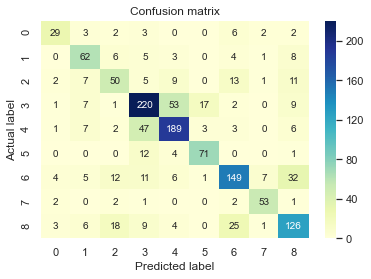

In [29]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        47
           1       0.64      0.70      0.67        89
           2       0.54      0.51      0.52        98
           3       0.70      0.71      0.71       310
           4       0.71      0.73      0.72       258
           5       0.77      0.81      0.79        88
           6       0.73      0.66      0.69       227
           7       0.82      0.87      0.84        61
           8       0.64      0.66      0.65       192

    accuracy                           0.69      1370
   macro avg       0.69      0.69      0.69      1370
weighted avg       0.69      0.69      0.69      1370

